# Customizing Colorbars

In [1]:
import matplotlib.pyplot as plt
plt.style.use("classic")
%matplotlib inline
import numpy as np

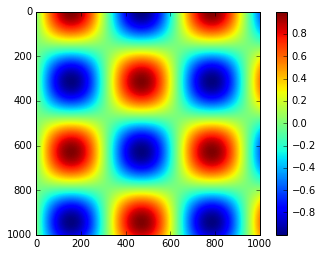

In [4]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

## Customizing Colorbars


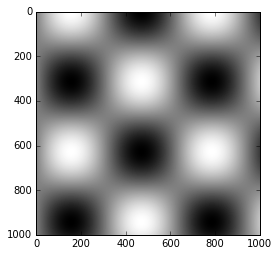

In [14]:
# Specify the colormap with cmap
plt.imshow(I, cmap="gray");

In [11]:
# see all available colormaps within IPython with
plt.cm#<TAB>

In [23]:
# Choosing a color

from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # Convert RGBA to grayscale
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    
    fig, ax = plt.subplots(2, figsize=(6,2), subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

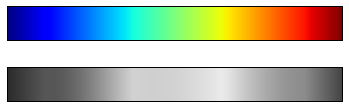

In [25]:
view_colormap("jet")

## Example: Hand written digits

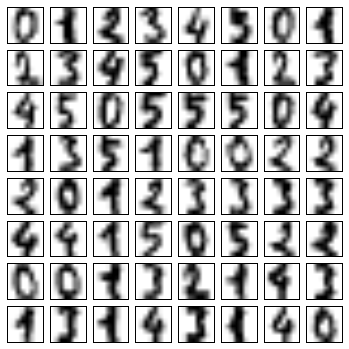

In [27]:
# Load images and display it
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

fig, ax = plt.subplots(8, 8, figsize=(6,6))

for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap="binary")
    axi.set(xticks=[], yticks=[])

In [29]:
# Manifold Learning example
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

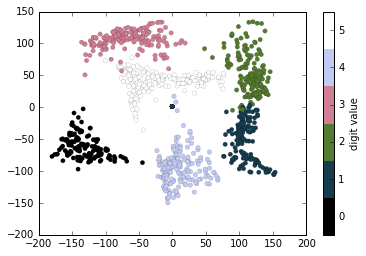

In [30]:
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1, c=digits.target, cmap=plt.cm.get_cmap("cubehelix", 6))
plt.colorbar(ticks=range(6), label="digit value")
plt.clim(-0.5, 5.5)